In [23]:
from HeaderP import *

In [65]:
ages=pd.read_csv('Gyrokinage2020_Prot.csv')
rvar=pd.read_pickle('../Rvars.pkl')
mass=pd.read_pickle('../Kinages_Prot.pkl')
actAge=pd.read_csv('ageact.csv')

In [66]:
df=pd.merge(ages,rvar,left_on='kepid',right_on='KID',how='inner')
df=pd.merge(df,mass[['KID','mass','logg']],left_on='KID',right_on='KID',how='inner')

Text(36.25, 0.5, 'log(Rvar [ppm])')

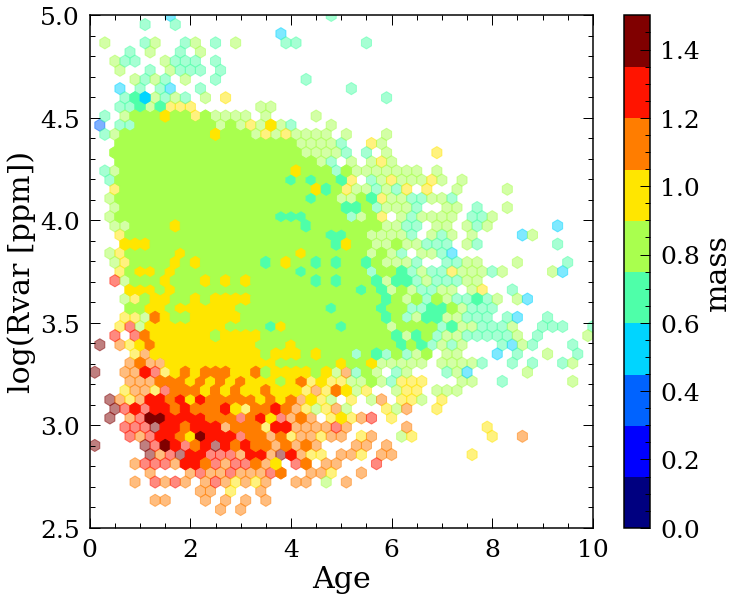

In [67]:
plt.figure(figsize=(10,8))
cmap1 = plt.cm.get_cmap('jet',10)
plt.hexbin(df['kin_age'].values,np.log10(df['Rvar'].values),C=(df['mass'].values),
                             cmap=cmap1,vmin=0,vmax=1.5, gridsize=50,extent=(0,10,2.5,5),
                             reduce_C_function = np.mean,mincnt=3,alpha=0.5)

plt.hexbin(df['kin_age'].values,np.log10(df['Rvar'].values),C=(df['mass'].values),
                             cmap=cmap1,vmin=0,vmax=1.5, gridsize=50,extent=(0,10,2.5,5),
                             reduce_C_function = np.mean,mincnt=10,alpha=1)


plt.xlim([0,10])
plt.ylim([2.5,5])
cb=plt.colorbar()
cb.set_label('mass')
plt.tight_layout() 
plt.xlabel('Age')
plt.ylabel('log(Rvar [ppm])')




In [68]:
actAge['KIC']=np.array(actAge['#KIC'],dtype=int)
df_age=pd.merge(df,actAge,left_on='kepid',right_on='KIC',how='inner')
np.shape(df_age)

(29, 34)

Text(20.375, 0.5, 'activity ages [Gyr]')

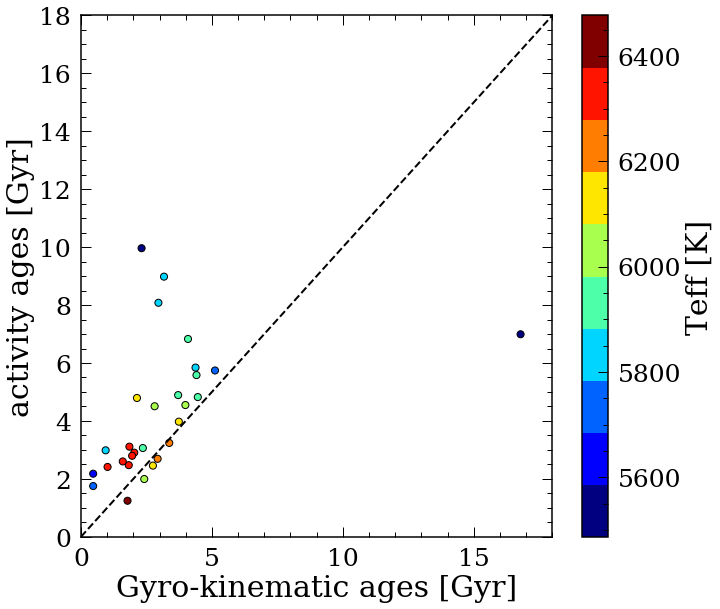

In [83]:
plt.figure(figsize=(10,8))
cmap = plt.cm.get_cmap('jet',10)
plt.scatter(df_age['kin_age'],df_age['Age[Gyr]'],c=df_age['Teff'],cmap=cmap,s=50,edgecolor='k')
plt.plot([0,20],[0,20],'k--')
plt.xlim([0,18])
plt.ylim([0,18])
cb=plt.colorbar()
cb.set_label('Teff [K]')
plt.tight_layout() 
plt.xlabel('Gyro-kinematic ages [Gyr]')
plt.ylabel('activity ages [Gyr]')

Text(0, 0.5, 'activity ages [Gyr]')

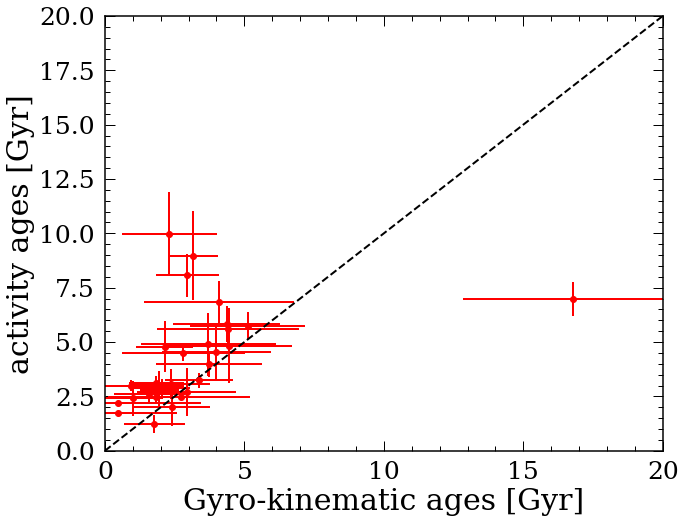

In [81]:
plt.figure(figsize=(10,8))
plt.errorbar(df_age['kin_age'],df_age['Age[Gyr]'],xerr=df_age['kin_age_err'],yerr=df_age['Age_err+'],fmt='ro')
plt.plot([0,20],[0,20],'k--')
plt.xlim([0,20])
plt.ylim([0,20])
plt.xlabel('Gyro-kinematic ages [Gyr]')
plt.ylabel('activity ages [Gyr]')

In [87]:
actAge['KIC']=np.array(actAge['#KIC'],dtype=int)
df_age=pd.merge(rvar,actAge,left_on='KID',right_on='KIC',how='inner')

Text(12.5, 0.5, 'Rvar')

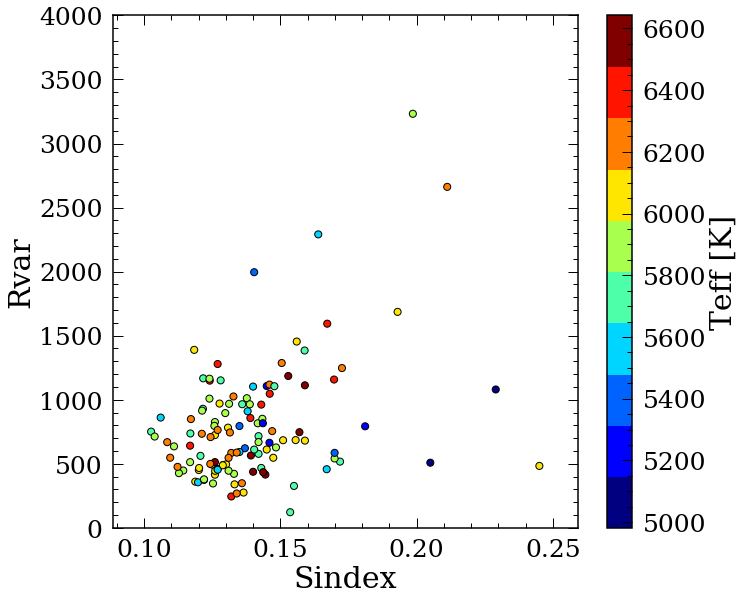

In [93]:
plt.figure(figsize=(10,8))
cmap = plt.cm.get_cmap('jet',10)
plt.scatter(df_age['Sindex'],df_age['Rvar'],c=df_age['Teff'],cmap=cmap,s=50,edgecolor='k')
#plt.plot([0,20],[0,20],'k--')
#plt.xlim([0,18])
plt.ylim([0,4000])
cb=plt.colorbar()
cb.set_label('Teff [K]')
plt.tight_layout() 
plt.xlabel('Sindex')
plt.ylabel('Rvar')